# Experiment 1

Jordan Perr-Sauer
11/29/2021

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("./OpenOA/examples")

import operational_analysis
print("OpenOA Version: ", operational_analysis.__file__, operational_analysis.__version__)
from operational_analysis.methods import plant_analysis

from project_ENGIE import Project_Engie
from tqdm import tqdm

import pandas as pd

import itertools

import time

import seaborn as sns

import matplotlib.pyplot as plt

from multiprocessing import Pool
import os
import tqdm
import random

OpenOA Version:  /Users/jperrsau/cu-src/appm5650/project/OpenOA/operational_analysis/__init__.py 2.2


In [3]:
project = Project_Engie('./OpenOA/examples/data/la_haute_borne')
project.prepare()

INFO:project_ENGIE:Loading SCADA data
INFO:operational_analysis.types.timeseries_table:Loading name:la-haute-borne-data-2014-2015
INFO:project_ENGIE:SCADA data loaded
INFO:project_ENGIE:Timestamp QC and conversion to UTC
INFO:project_ENGIE:Correcting for out of range of temperature variables
INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:project_ENGIE:Flagging unresponsive sensors
INFO:project_ENGIE:Converting field names to IEC 61400-25 standard
INFO:operational_analysis.types.timeseries_table:Loading name:plant_data
INFO:operational_analysis.types.timeseries_table:Loading name:plant_data
INFO:operational_analysis.types.timeseries_table:Loading name:merra2_la_haute_borne
INFO:operational_analysis.types.timeseries_table:Loading name:era5_wind_la_haute_borne


In [4]:
def experiment(num_sim, regression_frac, qmc, repetition, seed):
    start_time = time.perf_counter()

    pa = plant_analysis.MonteCarloAEP(project,
                                    reanal_products = ['era5', 'merra2'],
                                    regression_frac=regression_frac,
                                    qmc=qmc,
                                    seed=seed,
                                    bootstrap_reg_data=False,
                                    iav_normal_correction=False)
    pa.run(num_sim=num_sim, reanal_subset=['era5', 'merra2'])

    total_time = time.perf_counter() - start_time

    mean,std = pa.results["aep_GWh"].mean(), pa.results["aep_GWh"].std()

    res = {
        "num_sim":num_sim,
        "regression_frac":regression_frac,
        "qmc":qmc,
        "repetition": repetition,
        "time": total_time,
        "AEP mean": mean,
        "AEP stdev": std,
    }

    return res

In [5]:

num_sim = [128] #[128, 512]
regression_frac = [1.0] #[0.1, 1.0]
qmc = [True, False]
repetitions = range(20)

p = itertools.product(num_sim,regression_frac,qmc,repetitions)
results = list(map(lambda x: experiment(*(x + (random.randint(0,9999),))),p))

df = pd.DataFrame(results)
#df

INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object
INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 91.97it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 94.60it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 79.45it/s]

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 92.74it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 94.13it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 89.58it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 89.85it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 74.87it/s]

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 73.01it/s]

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 90.14it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 83.85it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 96.87it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 83.93it/s]

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 97.50it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 96.61it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 95.95it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 100.75it/s]

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 98.87it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 98.15it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 97.31it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 95.74it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 97.77it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 96.28it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 98.78it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 96.50it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 101.44it/s]

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 94.82it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 96.15it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 97.77it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 102.17it/s]

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 98.08it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 95.68it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 98.37it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 96.80it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 98.46it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 96.35it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 90.53it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 97.30it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 99.10it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object


INFO:operational_analysis.methods.plant_analysis:Running with parameters: {'uncertainty_meter': 0.005, 'uncertainty_losses': 0.05, 'uncertainty_loss_max': array([10., 20.]), 'uncertainty_windiness': array([10., 20.]), 'uncertainty_nan_energy': 0.01, 'num_sim': 128, 'reanal_subset': ['era5', 'merra2']}


100%|██████████| 128/128 [00:01<00:00, 93.48it/s] 

INFO:operational_analysis.methods.plant_analysis:Run completed


Text(0.5, 1.0, 'AEP Stdev')

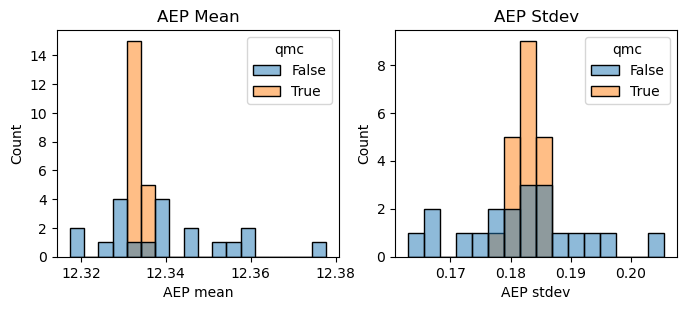

In [6]:
plt.figure(figsize=(8,3),dpi=100)

plt.subplot(1,2,1)
sns.histplot(data=df, x="AEP mean", hue="qmc")
plt.title("AEP Mean")

plt.subplot(1,2,2)
sns.histplot(data=df, x="AEP stdev", hue="qmc")
plt.title("AEP Stdev")

In [7]:

num_sim = [128] #[128, 512]
regression_frac = [0.1, 1.0] #[0.1, 1.0]
qmc = [False]
repetitions = range(30)

p = itertools.product(num_sim,regression_frac,qmc,repetitions)
results = list(map(lambda x: experiment(*x), p))

df = pd.DataFrame(results)
#df

TypeError: experiment() missing 1 required positional argument: 'seed'

Text(0.5, 1.0, 'AEP Stdev')

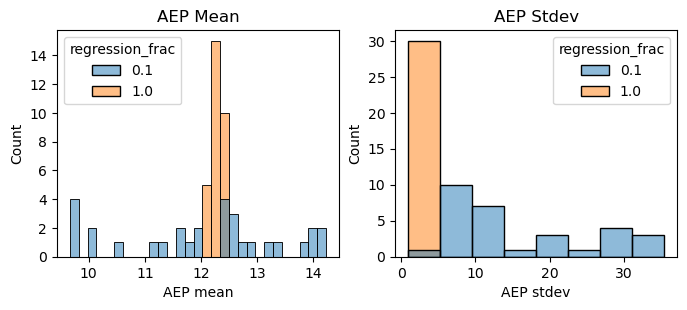

In [45]:
plt.figure(figsize=(8,3),dpi=100)

df["regression_frac"] = df["regression_frac"].astype("str")

plt.subplot(1,2,1)
sns.histplot(data=df, x="AEP mean", hue="regression_frac")
plt.title("AEP Mean")

plt.subplot(1,2,2)
sns.histplot(data=df, x="AEP stdev", hue="regression_frac")
plt.title("AEP Stdev")

## Full Cartesian Product

In [10]:

project = Project_Engie('./OpenOA/examples/data/la_haute_borne')
project.prepare()

num_sim = [128,256,512]
regression_frac = [0.5, 1.0] #[0.1, 1.0]
qmc = [False, True]
repetitions = range(2)

experiment_configs = list(itertools.product(num_sim,regression_frac,qmc,repetitions))

def run_experiment(x):
    return experiment(*x)

with Pool(4) as p:
    results = list(tqdm.tqdm(p.imap_unordered(run_experiment, experiment_configs), total=len(experiment_configs)))

#results = itertools.chain(*results)
#df

INFO:project_ENGIE:Loading SCADA data
INFO:operational_analysis.types.timeseries_table:Loading name:la-haute-borne-data-2014-2015
INFO:project_ENGIE:SCADA data loaded
INFO:project_ENGIE:Timestamp QC and conversion to UTC
INFO:project_ENGIE:Correcting for out of range of temperature variables
INFO:project_ENGIE:Flagging unresponsive sensors
INFO:project_ENGIE:Converting field names to IEC 61400-25 standard
INFO:operational_analysis.types.timeseries_table:Loading name:plant_data
INFO:operational_analysis.types.timeseries_table:Loading name:plant_data
INFO:operational_analysis.types.timeseries_table:Loading name:merra2_la_haute_borne
INFO:operational_analysis.types.timeseries_table:Loading name:era5_wind_la_haute_borne
  0%|          | 0/24 [00:00<?, ?it/s]INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object
INFO:operational_analysis.methods.plant_analysis:Initializing MonteCarloAEP Analysis Object
INFO:operational_analysis.methods.plant_analysis:Ini

In [11]:
out = list(results)
out

[{'num_sim': 128,
  'regression_frac': 0.5,
  'qmc': False,
  'repetition': 1,
  'time': 2.142662590999862,
  'AEP mean': 12.366266948027846,
  'AEP stdev': 1.0305229726132947},
 {'num_sim': 128,
  'regression_frac': 0.5,
  'qmc': False,
  'repetition': 0,
  'time': 2.153692824000018,
  'AEP mean': 12.366266948027846,
  'AEP stdev': 1.0305229726132947},
 {'num_sim': 128,
  'regression_frac': 0.5,
  'qmc': True,
  'repetition': 0,
  'time': 2.1719802800000707,
  'AEP mean': 12.326553379749589,
  'AEP stdev': 1.4153929225703434},
 {'num_sim': 128,
  'regression_frac': 0.5,
  'qmc': True,
  'repetition': 1,
  'time': 2.1749954360000174,
  'AEP mean': 12.317361158332663,
  'AEP stdev': 1.314907534233867},
 {'num_sim': 128,
  'regression_frac': 1.0,
  'qmc': False,
  'repetition': 0,
  'time': 2.3901782810000896,
  'AEP mean': 12.354642718237324,
  'AEP stdev': 1.1242201753576908},
 {'num_sim': 128,
  'regression_frac': 1.0,
  'qmc': False,
  'repetition': 1,
  'time': 2.397169399000177,
  

In [12]:
df = pd.DataFrame(out)

In [13]:
df

,num_sim,regression_frac,qmc,repetition,time,AEP mean,AEP stdev
0,128,0.5,False,1,2.142663,12.366267,1.030523
1,128,0.5,False,0,2.153693,12.366267,1.030523
2,128,0.5,True,0,2.171980,12.326553,1.415393
3,128,0.5,True,1,2.174995,12.317361,1.314908
4,128,1.0,False,0,2.390178,12.354643,1.124220
5,128,1.0,False,1,2.397169,12.354643,1.124220
6,128,1.0,True,1,2.392080,12.280698,1.468238
7,128,1.0,True,0,2.403176,12.286623,1.481731
8,256,0.5,False,0,4.417402,12.276734,1.200643
9,256,0.5,False,1,4.415555,12.276734,1.200643
